# Capstone Project 1: Data Wrangling

In this project, we study customer behaviours of a store in black friday. the data file is provided in kaggle website in csv format: 
https://www.kaggle.com/mehdidag/black-friday

data file includes customer information of around 550,000 observations.the variables are: User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3 and Purchase. 

Data Cleaning: we added few additional columns: Gender Category (binary values), and Age Category (Integer Values), in "Stay_In_Current_City_Years", we changed "+4" to 4 to be a categorical variable. we droped User_ID and Product_ID, since it probably won't help us. we change the type of Product_Category_2 and Product_Category_3 to int64 as well. 

Missing Values: we have missing values in "Product_Category_2" and "Product_Category_3" columns. it just means that specific customer haven't bought from that category, so we replace it with zero, which is helpful in modeling stage. 

Outliers: by using different type of visualizations, we showed that there is no outlier in dataset.

In [1]:
# Check the right path to call the data file
#pwd

In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

In [2]:
df = pd.read_csv('...\\BlackFriday.csv')

## 1. Data Cleaning

In [3]:
# We check the column names, they all look ok and descriptive. also, I check to make sure there is no extra space in the names.
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
# We can find the missing values by using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
# To check the total number of counts in each columns. as stated above, some values are null only in Product_Category_2 and Product_Category_3
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## 2. Missing Values and Continuation of Data Cleaning

In [6]:
# Now we fill Null values with zero
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)

In [7]:
# "Stay_In_Current_City_Years" column can change to an integer type. but first, we should take care of "+4" values
df.Stay_In_Current_City_Years.replace("4+",4,inplace=True)

In [8]:
# Drop User_ID and Product_ID columns, since they won't help us in our analysis
df = df.drop(columns=['User_ID','Product_ID'])

In [9]:
# change the columns to categorical or integer types. this way, data takes less memory as well.
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('int64')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [10]:
# Now, we add two additional columns. we categorize Gender and Age with numeric values
# Gender
def Gendr_Categry(x):
    if x.Gender == 'F':
        return 1
    else:
        return 0

df['Gender_Category'] = df.apply(Gendr_Categry, axis = 1)
# Age
def Ag_Cat(x):
    if x.Age == '0-17':
        return 0
    if x.Age == '18-25':
        return 1
    if x.Age == '26-35':
        return 2
    if x.Age == '36-45':
        return 3
    if x.Age == '46-50':
        return 4
    if x.Age == '51-55':
        return 5
    else:
        return 6
df['Age_Category'] = df.apply(Ag_Cat, axis = 1)


In [11]:
# By applying info method, we see how clean data looks so far.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null int64
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
Gender_Category               537577 non-null int64
Age_Category                  537577 non-null int64
dtypes: category(4), int64(8)
memory usage: 34.9 MB


## 3. Outliers Checking

In [12]:
# import the file one more time with a new dataframe name to check the outliers (without replacing missing values)
df2 = pd.read_csv('...\\BlackFriday.csv')

In [13]:
# a quick check of .describe() method, doesn't show any outliers. below figures don't show outliers either.
df2[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].describe()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000000,370591.000000,164278.000000,537577.000000
mean,5.295546,9.842144,12.669840,9333.859853
std,3.750701,5.087259,4.124341,4981.022133
min,1.000000,2.000000,3.000000,185.000000
25%,1.000000,5.000000,9.000000,5866.000000
50%,5.000000,9.000000,14.000000,8062.000000
75%,8.000000,15.000000,16.000000,12073.000000
max,18.000000,18.000000,18.000000,23961.000000


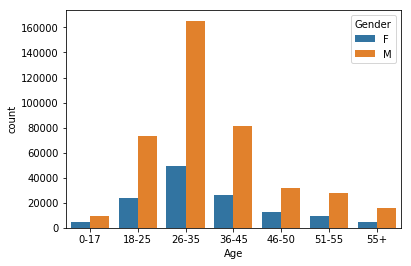

In [14]:
sns.countplot(x='Age',hue='Gender', data=df)
plt.show()

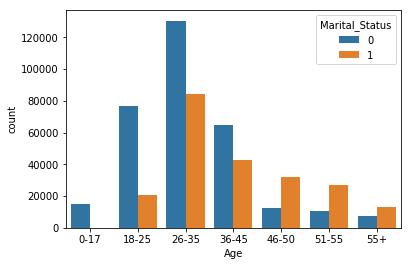

In [15]:
sns.countplot(x='Age',hue='Marital_Status', data=df)
plt.show()

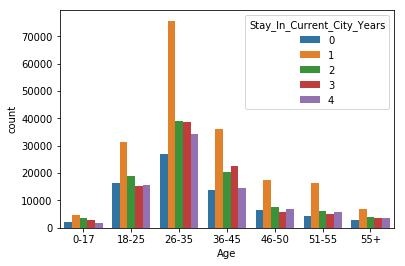

In [16]:
sns.countplot(x='Age',hue='Stay_In_Current_City_Years', data=df)
plt.show()

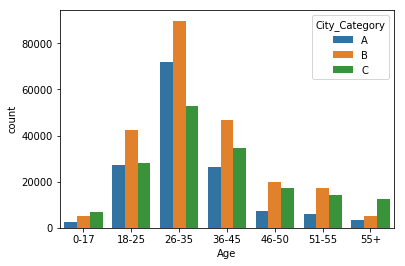

In [17]:
sns.countplot(x='Age',hue='City_Category', data=df)
plt.show()

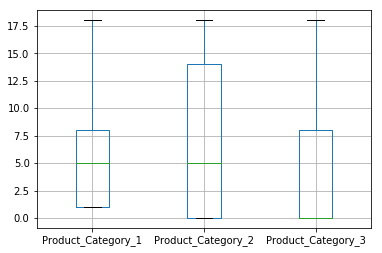

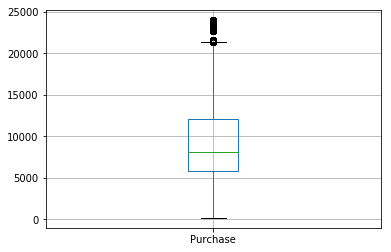

In [18]:
df.boxplot(column = ['Product_Category_1','Product_Category_2','Product_Category_3'])
plt.show()
df.boxplot(column = ['Purchase'])
plt.show()          

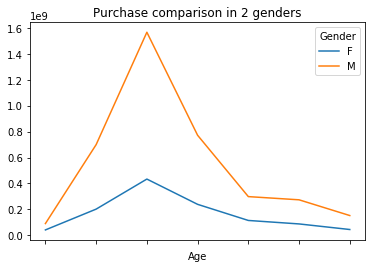

In [19]:
df = df.groupby(['Age','Gender']).Purchase.sum()
df = df.unstack('Gender')
df.plot(title = 'Purchase comparison in 2 genders')

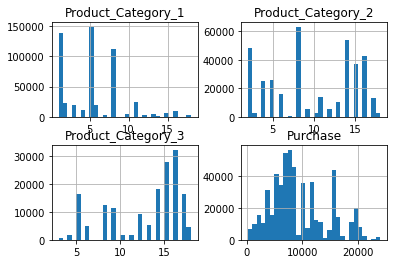

In [21]:
df = pd.read_csv('...\\BlackFriday.csv')
df = df[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
df.hist(bins = 30)
plt.show()

all these figures show that there is no outlier value in any of those columns. they all look to be in a specific range.